In [1]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler

## Load data

In [2]:
with open('../data/dataset/X_train_tfidf.npy', 'rb') as f:
    X_train = np.load(f)

with open('../data/dataset/X_test_tfidf.npy', 'rb') as f:
    X_test = np.load(f)

with open('../data/dataset/y_train_tfidf.npy', 'rb') as f:
    y_train = np.load(f)

with open('../data/dataset/y_test_tfidf.npy', 'rb') as f:
    y_test = np.load(f)

In [3]:
print(X_train.shape)
print(X_test.shape)

(2369, 53006)
(593, 53006)


In [4]:
sm = SMOTE(random_state=42, k_neighbors=10, n_jobs=-1)
X_train_over, y_train_over = sm.fit_sample(X_train, y_train)

In [5]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1850,  519]))

In [6]:
np.unique(y_train_over, return_counts=True)

(array([0, 1]), array([1850, 1850]))

In [7]:
clf = RandomForestClassifier(n_estimators=400, n_jobs=-1)
clf.fit(X_train_over, y_train_over)

RandomForestClassifier(n_estimators=400, n_jobs=-1)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
def scoring(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"accuracy: {acc:.2f} | precision: {pre:.2f} | recall: {rec:.2f} | f score: {f1:.2f}")

In [10]:
# Evaluate
scoring(y_test, y_pred)

accuracy: 0.87 | precision: 0.72 | recall: 0.69 | f score: 0.71


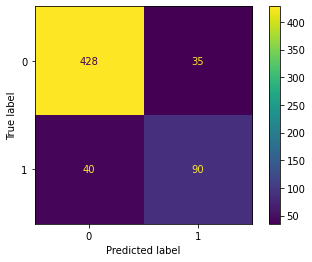

In [11]:
plot_confusion_matrix(clf, X_test, y_test)